# Machine Learning from First Principles  

## Overview  
This notebook presents a step-by-step implementation of fundamental machine learning models using mathematical formulations. The approach follows a structured methodology to bridge the gap between theoretical understanding and practical implementation.  

## Approach  

1. **Implementation Using Built-in Libraries**  
   - Utilize established machine learning libraries (e.g., `scikit-learn`).  
   - Observe model behavior and performance using predefined functions.  

2. **Mathematical Reconstruction**  
   - Implement the same models from scratch using mathematical foundations.  
   - Derive necessary equations for optimization and estimation.  
   - Validate results by comparing with built-in implementations.  

## Models Covered  

- **Simple Linear Regression**  
- **Multiple Linear Regression**  
- **Gradient Descent Optimization**  
- **Polynomial Regression**  
- **Lasso and Ridge Regression (Regularization)**  

## Objectives  

- Develop a clear mathematical intuition behind each model.  
- Implement machine learning algorithms without relying on external libraries.  
- Compare results with standard implementations to ensure correctness and efficiency.  

This notebook serves as a foundation for understanding core machine learning concepts through practical mathematical derivations and implementation.  


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.datasets import make_regression

### Simple Linear Regression

In [6]:
X,y = make_regression(n_samples=200,n_features=1,n_informative=1,n_targets=1,noise=30)
X.shape,y.shape

((200, 1), (200,))

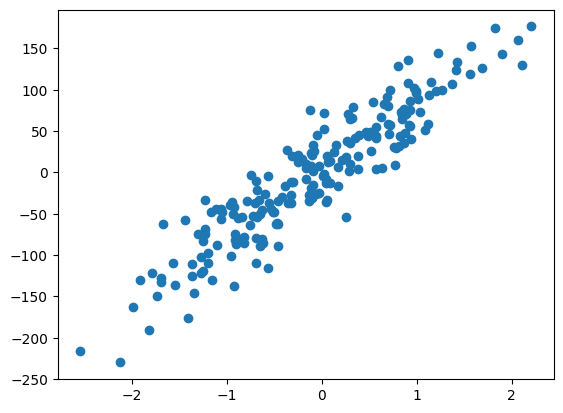

In [14]:
# Plotting data
plt.scatter(X,y)
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [16]:
X_train.shape,X_test.shape

((160, 1), (40, 1))

In [17]:
lr = LinearRegression()

In [19]:
lr.fit(X_train,y_train)

LinearRegression()

In [67]:
y_pred = lr.predict(X_test)

In [68]:
y_test.shape,y_pred.shape

((40,), (40,))

In [69]:
r2_score(y_test,y_pred)

0.8735684118649085

In [23]:
mean_absolute_error(y_test,y_pred)

27.66312811097647

In [24]:
mean_squared_error(y_test,y_pred)

1238.615912423643

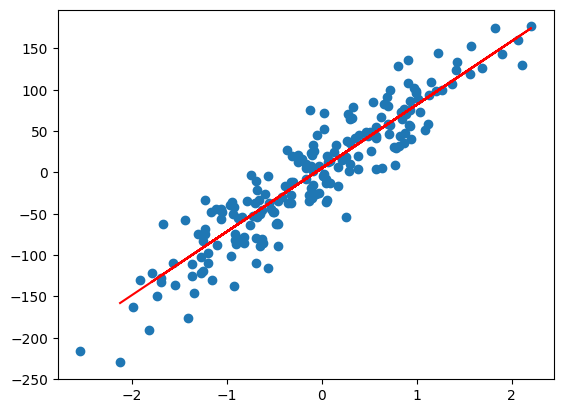

In [48]:
plt.scatter(X,y)
plt.plot(X_test,y_pred,color="r")
plt.show()

In [49]:
lr.coef_,lr.intercept_

(array([76.78343645]), 5.032209729142754)

- Creating our own **Class**

In [70]:
class SimpleLinearRegression:
    def __init__(self):
        self.b = None
        self.m = None

    def fit(self,X_train,y_train):
        num = 0
        den = 0

        for i in range(X_train.shape[0]):
            num = num + ( (y_train[i] - y_train.mean()) * (X_train[i] - X_train.mean()) )
            den = den + ( (X_train[i] - X_train.mean()) ** 2 )
            
        self.m = num / den
        self.b = y_train.mean() - np.dot(  X_train.mean() ,self.m )

        return self.b,self.m
    def predict(self,X_test):
        y_pred = np.dot(X_test,self.m) + self.b
        return y_pred

In [71]:
simpleLR = SimpleLinearRegression()

In [72]:
simpleLR.fit(X_train,y_train)

(array([5.03220973]), array([76.78343645]))

In [73]:
y_pred = simpleLR.predict(X_test)

In [74]:
y_test.shape,y_pred.shape

((40,), (40,))

In [75]:
r2_score(y_test,y_pred)

0.8735684118649085

In [76]:
mean_absolute_error(y_test,y_pred)

27.66312811097647

In [77]:
mean_squared_error(y_test,y_pred)

1238.6159124236426

## Model Results: [Simple Linear Regression]  

### Coefficients  

The learned coefficients for the [Simple Linear Regression] are as follows:  

- **Intercept (Bias Term):** `{5.032209729142754}`  
- **Feature Coefficients:**  `{76.78343645}`

### Model Performance  

- **Mean Squared Error (MSE):** `{1238.6159124236426}`
- **Mean Absolute Error (MSE):** `{27.66312811097647}`  
- **R² Score:** `{0.8735684118649085}`  

These values indicate how the model has learned the underlying patterns in the data. Further comparisons with built-in implementations ensure correctness.


### Multiple Linear Regression

In [78]:
X,y = make_regression(n_samples=150,n_features=2,n_informative=2,n_targets=1,noise=20)

In [80]:
X.shape,y.shape

((150, 2), (150,))

In [81]:
import plotly.express as px

In [84]:
df = pd.DataFrame({
    "X1": X[:,0],
    "X2": X[:,1],
    "y": y
})

In [85]:
df.head()

,X1,X2,y
0,-0.334259,0.416188,-56.740088
1,0.739601,-0.923554,42.635803
2,-1.226308,-0.137057,-76.631668
3,-1.570428,1.368411,-142.015929
4,-0.387291,-0.595177,-48.678509


In [92]:
# px.scatter_3d(df,x="X1",y="X2",z=y)

In [101]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
X_test.shape

(30, 2)

In [94]:
lr = LinearRegression()

In [95]:
lr.fit(X_train,y_train)

LinearRegression()

In [96]:
y_pred = lr.predict(X_test)

In [97]:
r2_score(y_test,y_pred)

0.937969064240951

In [98]:
mean_absolute_error(y_test,y_pred)

14.676102333189805

In [99]:
mean_squared_error(y_test,y_pred)

383.38756246819884

In [100]:
lr.coef_,lr.intercept_

(array([76.47726773,  2.99885218]), -2.0694255603927374)

- Building Our Own **Class**

In [105]:
class MultipleLinearReg:
    def __init__(self):
        self.coef_ = 0
        self.intercept_ = 0

    def fit(self,X_train,y_train):
        X_train = np.insert(X_train,0,1,axis=1)

        # Calculating Coeffecients
        betas = np.linalg.inv(np.dot(X_train.T,X_train)).dot(X_train.T).dot(y_train)
        self.intercept_ = betas[0]
        self.coef_ = betas[1:]
        return self.coef_,self.intercept_

    def predict(self,X_test):
        y_pred = np.dot(X_test,self.coef_) + self.intercept_
        return y_pred

In [106]:
mult = MultipleLinearReg()

In [107]:
mult.fit(X_train,y_train)

(array([76.47726773,  2.99885218]), -2.0694255603927405)

In [108]:
y_pred = mult.predict(X_test)

In [109]:
r2_score(y_test,y_pred)

0.9379690642409508

In [110]:
mean_absolute_error(y_test,y_pred)

14.676102333189805

In [111]:
mean_squared_error(y_test,y_pred)

383.38756246819895

## Model Results: [Multiple Linear Regression]  

### Coefficients  

The learned coefficients for the [Multiple Linear Regression] are as follows:  

- **Intercept (Bias Term):** `{-2.0694255603927405}`  
- **Feature Coefficients:**  `{[76.47726773,  2.99885218]}`

### Model Performance  

- **Mean Squared Error (MSE):** `{383.38756246819895}`
- **Mean Absolute Error (MSE):** `{14.676102333189805}`  
- **R² Score:** `{0.9379690642409508}`  

These values indicate how the model has learned the underlying patterns in the data. Further comparisons with built-in implementations ensure correctness.


# Implementing Gradient Descent for Linear Regression  

## Overview  
Now that we have implemented Linear Regression from scratch using the **normal equation**, we will extend our approach by optimizing the model parameters using **Gradient Descent**. This will allow us to handle larger datasets efficiently, where direct computation of the normal equation is infeasible due to **Inverse factor** which makes complexity higher.  

## Types of Gradient Descent  
We will implement and analyze the following **three variations** of Gradient Descent:  

1. **Batch Gradient Descent (BGD)**  
   - Updates parameters using the gradient computed over the **entire dataset** in each iteration.  
   - Converges smoothly but can be computationally expensive for large datasets.  

2. **Stochastic Gradient Descent (SGD)**  
   - Updates parameters using **one sample at a time**.  
   - Faster but introduces **high variance** in updates, leading to a noisy convergence.  

3. **Mini-Batch Gradient Descent (MBGD)**  
   - A compromise between BGD and SGD, updating parameters using **small batches** of data.  
   - Balances **efficiency** and **stability** in optimization.  

## Implementation Plan  
- Define the **cost function** and compute gradients for parameter updates.  
- Implement **each type of Gradient Descent** and tune learning rates for convergence.  
- Compare results with the **closed-form solution** (Normal Equation) to ensure correctness.  
- Evaluate performance based on **convergence speed** and **final parameter values**.  

Next, we will proceed with the implementation.  


- Using in-built **LinearRegression** Class over diabetes dataset 

In [112]:
from sklearn.datasets import load_diabetes

In [113]:
X,y = load_diabetes(return_X_y=True)

In [114]:
X.shape,y.shape

((442, 10), (442,))

In [116]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [118]:
lr = LinearRegression()

In [119]:
lr.fit(X_train,y_train)

LinearRegression()

In [120]:
y_pred = lr.predict(X_test)

In [187]:
scoreLinearreg = r2_score(y_test,y_pred)

In [188]:
scoreLinearreg

0.4313584900412373

In [123]:
lr.coef_

array([  -9.15865318, -205.45432163,  516.69374454,  340.61999905,
       -895.5520019 ,  561.22067904,  153.89310954,  126.73139688,
        861.12700152,   52.42112238])

In [124]:
lr.intercept_

151.88331005254167

## Caution
- At this point,we are not concerned with *how good our model is*

### Batch Gradient Descent (BGD)

In [143]:
class BGD:
    def __init__(self,epochs,learning_rate):
        self.coef_ = None
        self.intercept_ = None
        self.epochs = epochs
        self.lr = learning_rate

    def fit(self,X_train,y_train):
        # We are initializing coef_ with 1's and intercept_ with zero
        # We can Use advanced Weight Initializing Techniques but for this implementation I will stcik with 0's and 1's 
        # As it is easy to understand
        
        # Step-1: Initialize Weights
        self.coef_ = np.ones(X_train.shape[1]) # Current shape is (442,10) so our total Coef will be 10
        self.intercept_ = 1

        for i in range(self.epochs):
            # Step-2: Update Intercepts and Coeffecients
            # Update Rule ==> Weight(new) = Weight(old) - lr(Slope)
            y_hat = self.intercept_ + np.dot(X_train,self.coef_)
            intercept_deriv = -2 * np.mean(y_train - y_hat)
            self.intercept_ = self.intercept_ - self.lr*(intercept_deriv)

            coef_deriv = -2 * np.dot((y_train - y_hat),X_train) / X_train.shape[0]
            self.coef_ = self.coef_ - self.lr*(coef_deriv)
        return self.coef_,self.intercept_

    def predict(self,X_test):
        y_pred = np.dot(X_test,self.coef_) + self.intercept_
        return y_pred

##### We can play with lr and epochs to get desired result

In [193]:
batch = BGD(1000,0.4)

In [194]:
batch.fit(X_train,y_train)

(array([  23.72252031, -153.73153748,  468.33655823,  312.66333197,
         -29.57084814, -101.98445315, -193.1354999 ,  109.88244277,
         425.62315356,  108.08954858]),
 152.04695698782282)

In [195]:
y_pred = batch.predict(X_test)

In [196]:
batch.intercept_

152.04695698782282

In [197]:
scoreGD = r2_score(y_test,y_pred)

In [198]:
scoreGD

0.4539266726423461

### We are getting better r2 score 

### Stochastic Gradient Descent (SGD)

In [149]:
import random

In [172]:
class SGD:
    def __init__(self,epochs,learning_rate):
        self.coef_ = None
        self.intercept_ = None
        self.epochs = epochs
        self.lr = learning_rate

    def fit(self,X_train,y_train):
        
        # Step-1: Initialize Weights
        self.coef_ = np.ones(X_train.shape[1]) # Current shape is (442,10) so our total Coef will be 10
        self.intercept_ = 1

        # In SGD we randomly select a point and then based on that point we update our Coeff
        # So we converge to solution faster (Best for large datasets)

        for i in range(self.epochs):
            for j in range(X_train.shape[0]):
                # Selecting a random Index
                point = random.randint(0,X_train.shape[0] - 1)
                # Step-2: Update Intercepts and Coeffecients
                # Update Rule ==> Weight(new) = Weight(old) - lr(Slope)
                y_hat = self.intercept_ + np.dot(X_train[point],self.coef_)
                intercept_deriv = -2 * (y_train[point] - y_hat)
                self.intercept_ = self.intercept_ - self.lr*(intercept_deriv)
    
                coef_deriv = -2 * np.dot((y_train[point] - y_hat),X_train[point])
                self.coef_ = self.coef_ - self.lr*(coef_deriv)
        return self.coef_,self.intercept_

    def predict(self,X_test):
        y_pred = np.dot(X_test,self.coef_) + self.intercept_
        return y_pred
    

In [201]:
sch = SGD(100,0.01)

In [202]:
sch.fit(X_train,y_train)

(array([  25.78916343, -147.48731479,  459.84290725,  293.37722986,
         -25.53511989,  -95.6201644 , -188.42052247,  112.00676136,
         411.54530298,  106.95828171]),
 146.18871042045205)

In [203]:
y_pred = sch.predict(X_test)

In [204]:
scoreSGD = r2_score(y_test,y_pred)

In [205]:
scoreSGD

0.44843073890341123

### Mini-Batch Gradient Descent (MBGD)

In [180]:
class MBGD:
    def __init__(self,epochs,learning_rate,batch_size):
        self.coef_ = None
        self.intercept_ = None
        self.epochs = epochs
        self.lr = learning_rate
        self.batch = batch_size

    def fit(self,X_train,y_train):
        
        # Step-1: Initialize Weights
        self.coef_ = np.ones(X_train.shape[1]) # Current shape is (442,10) so our total Coef will be 10
        self.intercept_ = 1

        # In SGD we randomly select a point and then based on that point we update our Coeff
        # So we converge to solution faster (Best for large datasets)

        for i in range(self.epochs):
            for j in range(int(X_train.shape[0] / self.batch)):
                
                point = random.sample(range(X_train.shape[0]),self.batch)
                # Step-2: Update Intercepts and Coeffecients
                # Update Rule ==> Weight(new) = Weight(old) - lr(Slope)
                y_hat = self.intercept_ + np.dot(X_train[point],self.coef_)
                intercept_deriv = -2 * np.mean(y_train[point] - y_hat)
                
                self.intercept_ = self.intercept_ - self.lr*(intercept_deriv)
    
                coef_deriv = -2 * np.dot((y_train[point] - y_hat),X_train[point])
                self.coef_ = self.coef_ - self.lr*(coef_deriv)
                
        return self.coef_,self.intercept_

    def predict(self,X_test):
        y_pred = np.dot(X_test,self.coef_) + self.intercept_
        return y_pred
    

In [208]:
mbatch = MBGD(100,0.1,20)

In [209]:
mbatch.fit(X_train,y_train)

(array([ -24.20257976, -186.45238507,  539.13956893,  348.14512703,
        -128.96971821,  -61.28358615, -171.01179634,   50.579168  ,
         591.20028003,   31.09718717]),
 156.49348961592557)

In [210]:
y_pred = mbatch.predict(X_test)

In [211]:
scoreMB = r2_score(y_test,y_pred)

In [212]:
scoreMB

0.4355377687696036

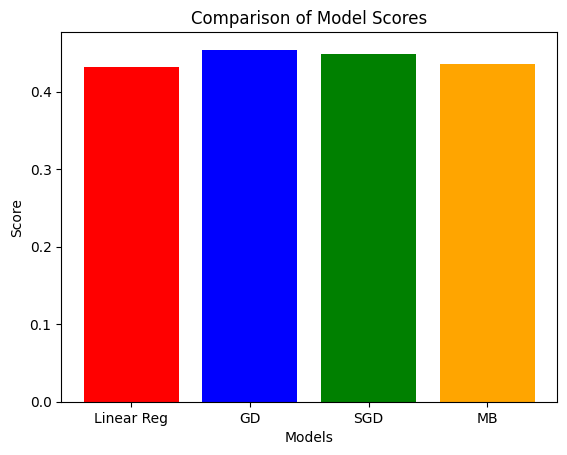

In [214]:
models = ["Linear Reg", "GD", "SGD", "MB"]
scores = [scoreLinearreg, scoreGD, scoreSGD, scoreMB]
plt.bar(models, scores, color=["red", "blue", "green", "orange"])
plt.xlabel("Models")
plt.ylabel("Score")
plt.title("Comparison of Model Scores")
plt.show()

# Conclusion  

## Key Takeaways  
In this notebook, we successfully implemented **Linear Regression** using both:  
- **Closed-form solution (Normal Equation)** for direct computation of optimal parameters.  
- **Gradient Descent** to iteratively optimize parameters when direct computation is impractical.  

We explored three types of **Gradient Descent**:  
1. **Batch Gradient Descent (BGD)** – Stable but computationally expensive.  
2. **Stochastic Gradient Descent (SGD)** – Fast but introduces high variance.  
3. **Mini-Batch Gradient Descent (MBGD)** – A balance between BGD and SGD, often preferred in practice.  

## Performance Comparison  
- The **Normal Equation** provided an exact solution but is computationally infeasible for large datasets.  
- **Gradient Descent** methods provided approximate solutions, requiring careful tuning of **learning rates** and **iterations** for convergence.  
- **Mini-Batch Gradient Descent** showed the best trade-off between efficiency and convergence stability.  

## Next Steps  
Moving forward, we can extend our approach to **regularized regression methods** such as:  
- **Lasso Regression** (L1 Regularization)  
- **Ridge Regression** (L2 Regularization)  
- **Polynomial Regression** for capturing nonlinear patterns  

These techniques will help improve model **generalization** and **interpretability** in more complex datasets.  

---

This marks the completion of our **Linear Regression with Gradient Descent** implementation. Let’s proceed with **regularized regression models** to enhance model robustness.  


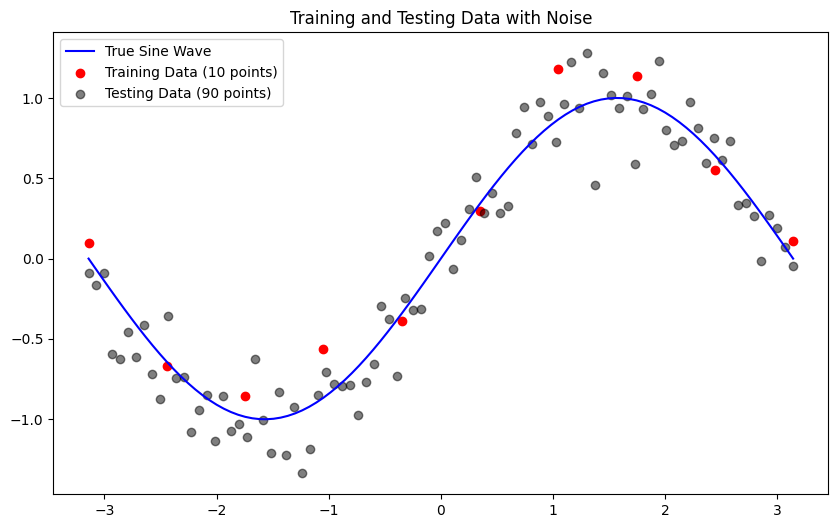

In [217]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import  Ridge

# Set random seed for reproducibility
np.random.seed(42)

# Generate true sine wave
X_true = np.linspace(-np.pi, np.pi, 100).reshape(-1, 1)
y_true = np.sin(X_true)

# Add noise to the data for training
def generate_noisy_sinusoidal_data(n_points, noise_std):
    X = np.linspace(-np.pi, np.pi, n_points).reshape(-1, 1)
    y = np.sin(X) + np.random.normal(0, noise_std, size=X.shape)
    return X, y

# Training data (10 noisy points)
X_train, y_train = generate_noisy_sinusoidal_data(10, noise_std=0.2)

# Testing data (90 noisy points)
X_test, y_test = generate_noisy_sinusoidal_data(90, noise_std=0.2)

# Plot the true curve, training data, and testing data
plt.figure(figsize=(10, 6))
plt.plot(X_true, y_true, label='True Sine Wave', color='blue')
plt.scatter(X_train, y_train, color='red', label='Training Data (10 points)')
plt.scatter(X_test, y_test, color='black', label='Testing Data (90 points)', alpha=0.5)
plt.legend()
plt.title('Training and Testing Data with Noise')
plt.show()

# Plan of Attack  

In this section, we aim to explore **Polynomial Regression** and its impact on model performance, particularly in terms of underfitting and overfitting.  

## Approach  
1. **Generate Sinusoidal Data:**  
   - We will use a sine wave as our dataset to demonstrate the challenges of linear models on nonlinear patterns.  

2. **Polynomial Regression with Degree 1:**  
   - This serves as a baseline and should yield results similar to **Linear Regression**, illustrating underfitting.  

3. **Polynomial Regression with Degree 9:**  
   - A high-degree polynomial model will be used to demonstrate **overfitting**, capturing noise rather than the underlying trend.  

4. **Custom Polynomial Regression Implementation:**  
   - We will build our own **Polynomial Regression class** from scratch to verify that our mathematical derivations align with the expected results.  
   - This custom model will be tested for **Degree 1 and Degree 9** to validate its correctness against the built-in implementation.  

## Expected Outcomes  
- **Degree 1:** Poor fit due to underfitting (high bias, low variance).  
- **Degree 9:** Excessive complexity leading to overfitting (low bias, high variance).  
- **Custom Implementation:** Matches built-in results, proving the correctness of our mathematical formulation.  

Through this structured approach, we will gain insights into **bias-variance trade-off** and how polynomial regression helps in capturing nonlinear relationships effectively.  


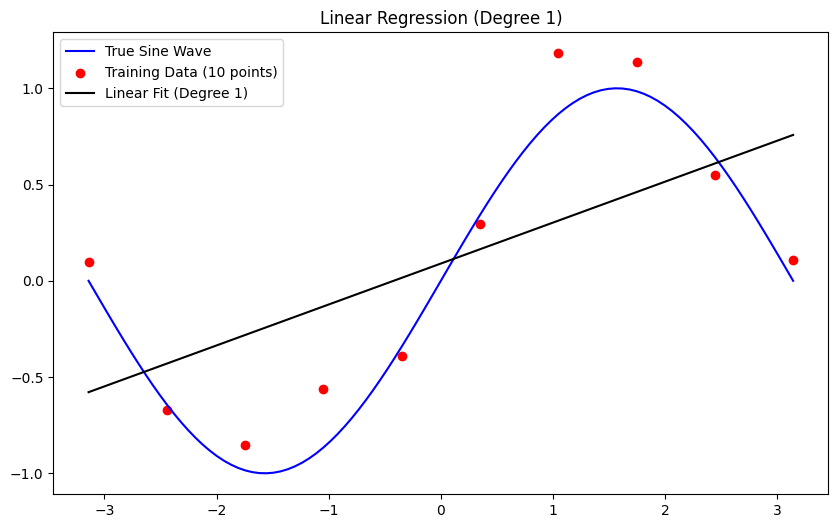

Linear Regression (Degree 1) - Training Error: 0.2851, Test Error: 0.2901
Learned parameters:
 [[0.         0.21268527]]


In [223]:
# Perform linear regression (degree=1)
poly_features = PolynomialFeatures(degree=1)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)
X_true_poly = poly_features.fit_transform(X_true)

linear_regressor = LinearRegression()
linear_regressor.fit(X_train_poly, y_train)

# Predict for both train and test data
y_train_pred = linear_regressor.predict(X_train_poly)
y_test_pred = linear_regressor.predict(X_test_poly)
y_true_pred = linear_regressor.predict(X_true_poly)

# Plot the true curve, training points, and linear fit
plt.figure(figsize=(10, 6))
plt.plot(X_true, y_true, label='True Sine Wave', color='blue')
plt.scatter(X_train, y_train, color='red', label='Training Data (10 points)')
plt.plot(X_true, y_true_pred, label='Linear Fit (Degree 1)', color='black')
plt.legend()
plt.title('Linear Regression (Degree 1)')
plt.show()

# Evaluate the error on both train and test sets
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)
print(f"Linear Regression (Degree 1) - Training Error: {train_error:.4f}, Test Error: {test_error:.4f}")
print("Learned parameters:\n", linear_regressor.coef_)

- Clearly Model is **UnderFitting**

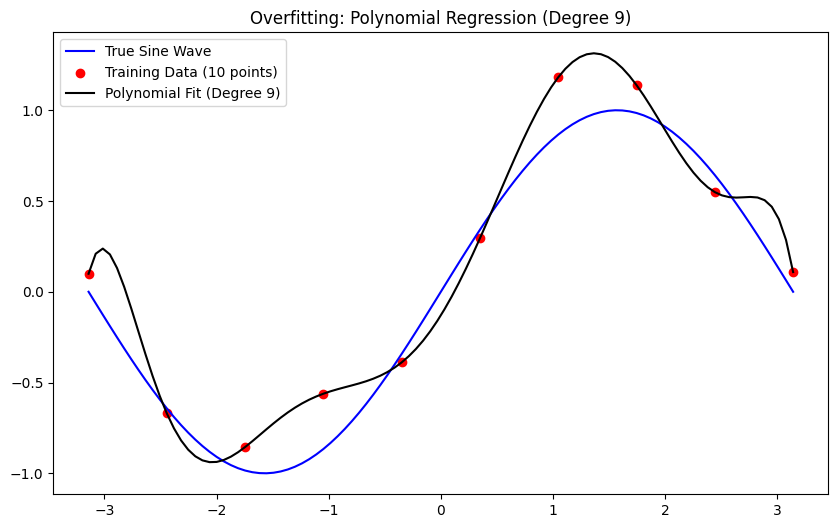

Polynomial Regression (Degree 9) - Training Error: 0.0000, Test Error: 0.0872
Learned parameters:
 [[ 0.00000000e+00  9.99205043e-01  7.20559275e-01 -1.60028853e-01
  -3.47418446e-01  7.76212594e-03  5.39971162e-02 -5.65879676e-04
  -2.62935014e-03  3.89527864e-05]]


In [226]:
# Try polynomial regression with a higher degree (degree=9)
poly_features = PolynomialFeatures(degree=9)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)
X_true_poly = poly_features.fit_transform(X_true)

poly_regressor = LinearRegression()
poly_regressor.fit(X_train_poly, y_train)

# Predict for both train and test data
y_train_pred_poly = poly_regressor.predict(X_train_poly)
y_test_pred_poly = poly_regressor.predict(X_test_poly)
y_true_pred_poly = poly_regressor.predict(X_true_poly)

# Plot the true curve, training points, and high-degree polynomial fit
plt.figure(figsize=(10, 6))
plt.plot(X_true, y_true, label='True Sine Wave', color='blue')
plt.scatter(X_train, y_train, color='red', label='Training Data (10 points)')
plt.plot(X_true, y_true_pred_poly, label='Polynomial Fit (Degree 9)', color='black')
plt.legend()
plt.title('Overfitting: Polynomial Regression (Degree 9)')
plt.show()

# Evaluate the error on both train and test sets
train_error_poly = mean_squared_error(y_train, y_train_pred_poly)
test_error_poly = mean_squared_error(y_test, y_test_pred_poly)
print(f"Polynomial Regression (Degree 9) - Training Error: {train_error_poly:.4f}, Test Error: {test_error_poly:.4f}")
print("Learned parameters:\n", poly_regressor.coef_)

### Creating PolyNomial Regression Class

In [231]:
class PolyReg:
    def __init__(self,degree):
        self.intercept_ = None
        self.coef_ = None
        self.degree = degree

    def fit(self, X_train, y_train):
        # we will create 2d matrix with zeroes, will call it A
        # Ax = B ==> x = inv(A)*b
        A = np.zeros((self.degree + 1, self.degree + 1))
        b = np.zeros((self.degree + 1, 1))

        for i in range(self.degree + 1):
            for j in range(self.degree + 1):
                A[i, j] = sum(X_train**(i + j))
            b[i] = sum(X_train**i * y_train)

        betas = np.dot(np.linalg.inv(A), b)

        self.intercept_ = betas[0]  
        self.coef_ = betas[1:]
        
        return self.intercept_, self.coef_

    def pred(self, X_test):
        poly_terms = np.hstack([X_test ** i for i in range(1, self.degree + 1)])
        return np.dot(poly_terms,self.coef_) + self.intercept_

In [232]:
poly = PolyReg(9)

In [233]:
poly.fit(X_train,y_train)

/tmp/ipykernel_102375/2419935397.py:13: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



(array([-0.12956609]),
 array([[ 9.99205043e-01],
        [ 7.20559275e-01],
        [-1.60028853e-01],
        [-3.47418446e-01],
        [ 7.76212592e-03],
        [ 5.39971162e-02],
        [-5.65879673e-04],
        [-2.62935014e-03],
        [ 3.89527862e-05]]))

- We got same Coeff with our Own Implemented Class

### Generalization Using Ridge Regularization

Ridge regression modifies the linear (or polynomial) regression loss by adding a regularization term to penalize large weights. This helps prevent overfitting.

Loss Function:

$\text{Ridge Loss} = \frac{1}{n} \sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2 + \alpha \sum_{j=1}^{p} w_j^2$
 
where:

- $\frac{1}{n} \sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2$ is the MSE.
- $\sum_{j=1}^{p} w_j^2$ is the L2 regularization term.
- $\alpha$ is a regularization hyperparameter controlling the strength of the penalty.
- $w_j$ are the model parameters (weights).

The regularization term penalizes large values of weights, effectively discouraging overfitting by smoothing the model's parameters.


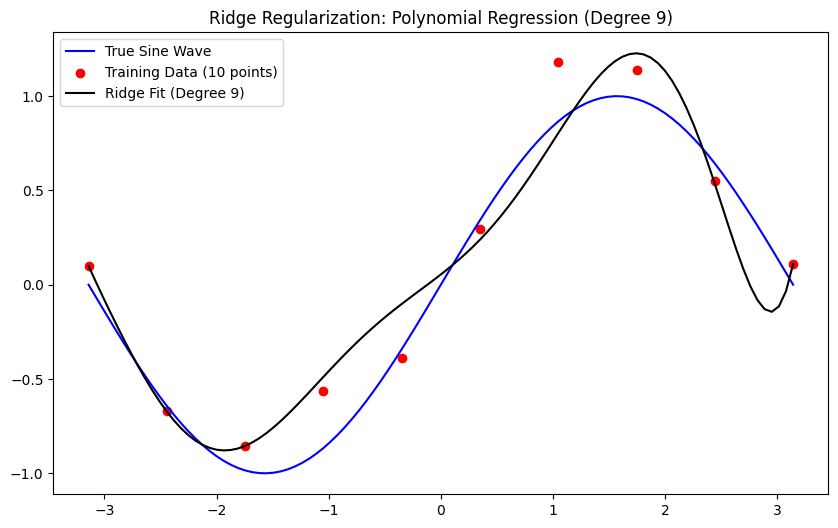

Ridge Regression (Degree 9) - Training Error: 0.0242, Test Error: 0.0843
Learned parameters:
 [ 0.00000000e+00  4.63903732e-01  1.18176869e-01  2.10992013e-01
 -1.91123181e-02 -7.09832072e-02 -2.94433406e-03  5.57267043e-03
  3.76903355e-04 -1.04106240e-04]
Learned parameters:
 [0.05439698]


In [234]:
# Ridge regression with regularization (L2 penalty)
ridge_regressor = Ridge(alpha=1.0)
ridge_regressor.fit(X_train_poly, y_train)

# Predict for train, test, and true data
y_train_pred_ridge = ridge_regressor.predict(X_train_poly)
y_test_pred_ridge = ridge_regressor.predict(X_test_poly)
y_true_pred_ridge = ridge_regressor.predict(X_true_poly)

# Plot the true curve, training points, and Ridge regression fit
plt.figure(figsize=(10, 6))
plt.plot(X_true, y_true, label='True Sine Wave', color='blue')
plt.scatter(X_train, y_train, color='red', label='Training Data (10 points)')
plt.plot(X_true, y_true_pred_ridge, label='Ridge Fit (Degree 9)', color='black')
plt.legend()
plt.title('Ridge Regularization: Polynomial Regression (Degree 9)')
plt.show()

# Evaluate the error with Ridge regularization
train_error_ridge = mean_squared_error(y_train, y_train_pred_ridge)
test_error_ridge = mean_squared_error(y_test, y_test_pred_ridge)
print(f"Ridge Regression (Degree 9) - Training Error: {train_error_ridge:.4f}, Test Error: {test_error_ridge:.4f}")
print("Learned parameters:\n", ridge_regressor.coef_)
print("Learned parameters:\n", ridge_regressor.intercept_)


### Implementing Ridge Regression Class

In [235]:
class RidgePolyReg:
    def __init__(self, degree, alpha=1.0):
        self.intercept_ = None
        self.coef_ = None
        self.degree = degree
        self.alpha = alpha 

    def fit(self, X_train, y_train):
        # Creating polynomial features
        X_poly = np.hstack([X_train ** i for i in range(1, self.degree + 1)])
        # We will Add Bias Term
        X_poly = np.insert(X_poly, 0, 1, axis=1)  
        
        # Compute A = X^T * X
        A = np.dot(X_poly.T, X_poly)

        # Add regularization term (lambda * I)
        lambda_I = self.alpha * np.eye(A.shape[0])
        lambda_I[0, 0] = 0  # Do NOT regularize intercept
        A += lambda_I

        # Computing b = X^T * y
        b = np.dot(X_poly.T, y_train)
        betas = np.linalg.inv(A).dot(b)

        self.intercept_ = betas[0]
        self.coef_ = betas[1:]
        return self.intercept_,self.coef_

    def predict(self, X_test):
        X_poly = np.hstack([X_test ** i for i in range(1, self.degree + 1)])
        return np.dot(X_poly, self.coef_) + self.intercept_


In [236]:
ridg = RidgePolyReg(9,alpha=1.0)

In [237]:
ridg.fit(X_train,y_train)

(array([0.05439698]),
 array([[ 4.63903732e-01],
        [ 1.18176869e-01],
        [ 2.10992013e-01],
        [-1.91123181e-02],
        [-7.09832072e-02],
        [-2.94433406e-03],
        [ 5.57267043e-03],
        [ 3.76903355e-04],
        [-1.04106240e-04]]))

##### We Got Same Coeffecients with Our Class